# 按文本计数词汇

In [27]:
import matplotlib.pyplot as plt

In [1]:
from nltk.corpus import brown

In [2]:
from nltk import ConditionalFreqDist

In [3]:
cfd1=ConditionalFreqDist(
    (genre,word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))#构建条件频率字典

In [4]:
genre_word=[(genre,word)
            for genre in ['news','romance']
            for word in brown.words(categories=genre)]

In [5]:
len(genre_word)

170576

In [6]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [7]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

In [50]:
cfd=ConditionalFreqDist(genre_word)

In [9]:
cfd

<ConditionalFreqDist with 2 conditions>

In [11]:
cfd.conditions()

['news', 'romance']

In [13]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

In [51]:
list(cfd['romance'])[0:5]

['They', 'neither', 'liked', 'nor', 'disliked']

In [15]:
cfd['romance']['could']

193

# 绘制分布图和分布表

In [17]:
from nltk.corpus import inaugural

In [20]:
target_fileid = [(target,fileid[:4])
         for fileid in inaugural.fileids()
         for w in inaugural.words(fileid)
         for target in ['america','citizen']
         if w.lower().startswith(target)] #多重链表推导

In [22]:
cfd2 = ConditionalFreqDist(target_fileid)

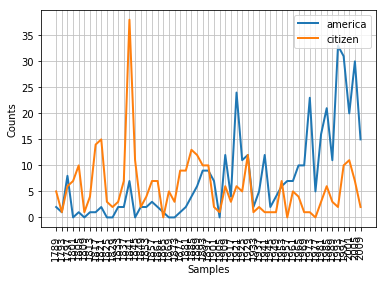

In [28]:
cfd2.plot()

In [29]:
from nltk.corpus import udhr

In [33]:
udhr.fileids()[:5]

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8']

In [30]:
languages = ['Chickasaw','English','German_Deutsch',
            'Greenlandic_Inuktikut','Hungarian_Magyar','Ibibio_Efik']

In [34]:
lang_word = [(lang,len(word))
            for lang in languages
            for word in udhr.words(lang + '-Latin1')] #利用语言的文件名格式：语言名称+字符编码

In [35]:
cfd3 = ConditionalFreqDist(lang_word)

In [43]:
cfd3.tabulate(conditions=['English','German_Deutsch'],
             samples= range(10),cumulative=True)#cumulative=True代表累计频数，False代表分段频数

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


# demo

找出一周中最有新闻价值和最浪漫的日子

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nltk import ConditionalFreqDist

In [5]:
from nltk.corpus import brown

In [48]:
brown.categories()#news romance

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [6]:
genre_word=[(genre,word)
            for genre in ['news','romance']
            for word in brown.words(categories=genre)]

In [7]:
cfd=ConditionalFreqDist(genre_word)

In [8]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [9]:
cfd.tabulate(conditions=['news','romance'],samples=days)

           Monday   Tuesday Wednesday  Thursday    Friday 
   news        54        43        22        20        41 
romance         2         3         3         1         3 


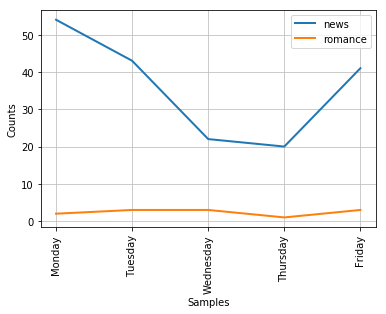

In [10]:
cfd.plot(conditions=['news','romance'],samples=days)

# 使用双连词生成随机文本